MENTAL HEALTH CLUSTERING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve

In [2]:
mental_health_dataset = pd.read_csv("survey.csv")
orig_mental_health_dataset = mental_health_dataset.copy()
orig_mental_health_dataset.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
def understand_variables(dataset):
    print("Type = " +str(type(dataset))+"\n")
    print("Shape = "+str(dataset.shape)+"\n")
    print("Head : \n\n"+str(dataset.head())+"\n\n")
    print(str(dataset.info())+"\n\n")
    print("No.of unique values :\n\n"+str(dataset.nunique(axis=0))+"\n\n")
    print("Description :\n\n"+str(dataset.describe())+"\n\n")

    #print(dataset.describe(exclude=[np.number]))
    #Since no categorical variables, no need to have the above line

    print("Null count :\n\n"+str(dataset.isnull().sum()))

understand_variables(mental_health_dataset)

Type = <class 'pandas.core.frame.DataFrame'>

Shape = (1259, 27)

Head : 

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0 

In [8]:
def understand_dist(dataset,feature_type):

    if feature_type == "Categorical":

        categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
        dataframes=[]
        for feature in categorical_features:
            dataframe=dataset[feature].value_counts().rename_axis(feature).reset_index(name='counts')
            dataframes.append(dataframe)

            plt.figure(figsize=(10,8))
            sns.countplot(y=feature,data = dataset)
            plt.show()
            print(dataframe,'\n')

        #for i in range(len(dataframes)):
        #    print(dataframes[i],'\n')

    elif feature_type == "Numeric":

        numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']

        for feature in numerical_features:
            plt.figure(figsize=(10,4))
            sns.distplot(dataset[feature])
            plt.show()

            print("Description :\n\n"+str(dataset[feature].describe())+"\n\n")

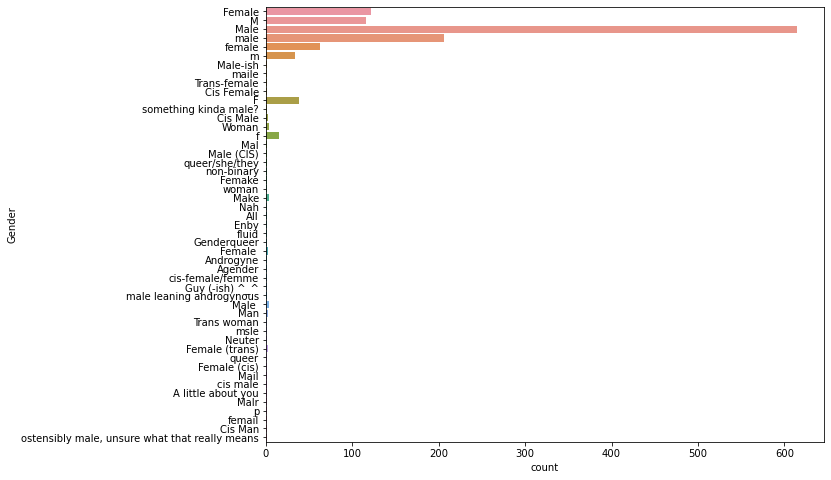

                                            Gender  counts
0                                             Male     615
1                                             male     206
2                                           Female     121
3                                                M     116
4                                           female      62
5                                                F      38
6                                                m      34
7                                                f      15
8                                             Make       4
9                                            Woman       3
10                                           Male        3
11                                             Man       2
12                                  Female (trans)       2
13                                        Cis Male       2
14                                         Female        2
15                                        Male-ish      

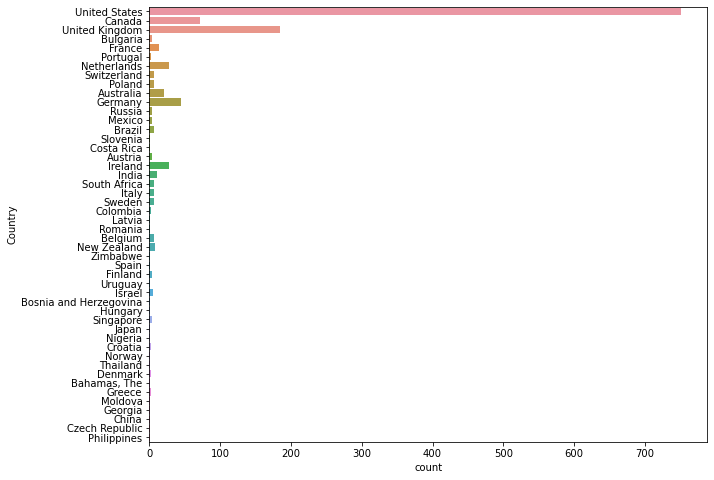

                   Country  counts
0            United States     751
1           United Kingdom     185
2                   Canada      72
3                  Germany      45
4                  Ireland      27
5              Netherlands      27
6                Australia      21
7                   France      13
8                    India      10
9              New Zealand       8
10             Switzerland       7
11                  Sweden       7
12                   Italy       7
13                  Poland       7
14            South Africa       6
15                 Belgium       6
16                  Brazil       6
17                  Israel       5
18                Bulgaria       4
19               Singapore       4
20                  Mexico       3
21                  Russia       3
22                 Finland       3
23                 Austria       3
24                 Denmark       2
25                  Greece       2
26                Portugal       2
27                Co

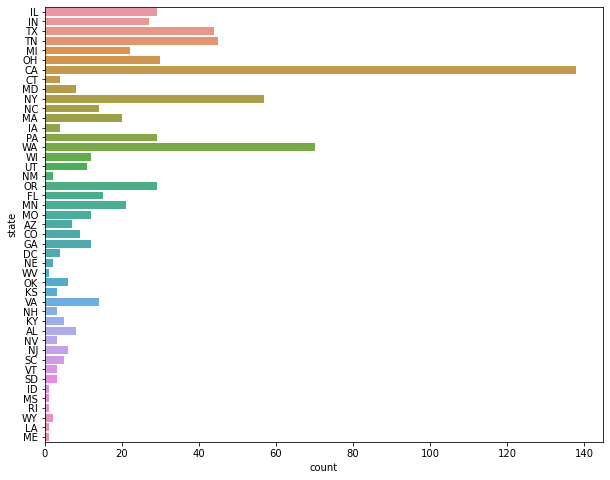

   state  counts
0     CA     138
1     WA      70
2     NY      57
3     TN      45
4     TX      44
5     OH      30
6     PA      29
7     IL      29
8     OR      29
9     IN      27
10    MI      22
11    MN      21
12    MA      20
13    FL      15
14    VA      14
15    NC      14
16    MO      12
17    GA      12
18    WI      12
19    UT      11
20    CO       9
21    MD       8
22    AL       8
23    AZ       7
24    NJ       6
25    OK       6
26    KY       5
27    SC       5
28    CT       4
29    DC       4
30    IA       4
31    KS       3
32    NH       3
33    SD       3
34    NV       3
35    VT       3
36    NE       2
37    WY       2
38    NM       2
39    ID       1
40    LA       1
41    ME       1
42    WV       1
43    MS       1
44    RI       1 



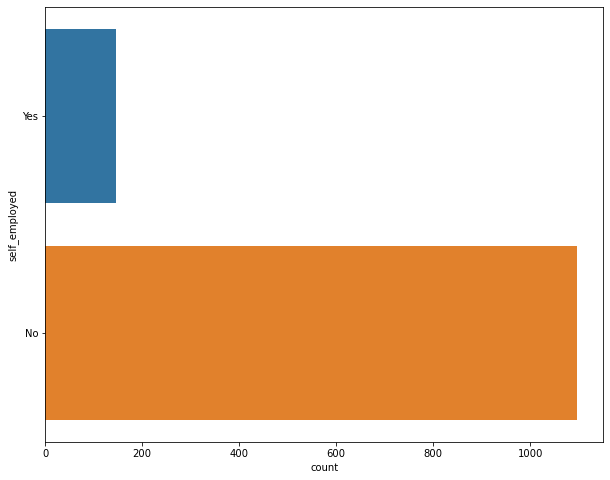

  self_employed  counts
0            No    1095
1           Yes     146 



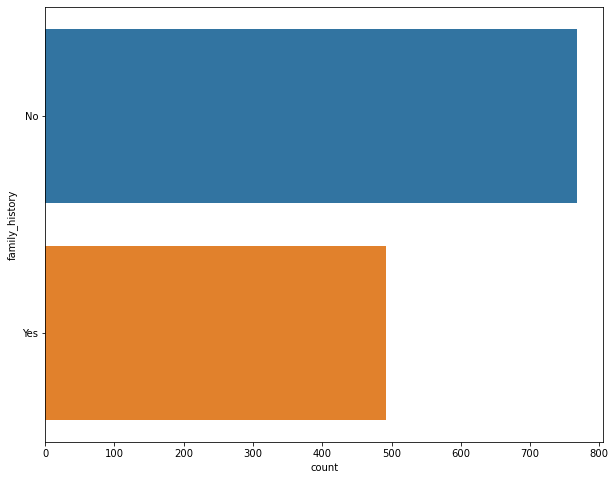

  family_history  counts
0             No     767
1            Yes     492 



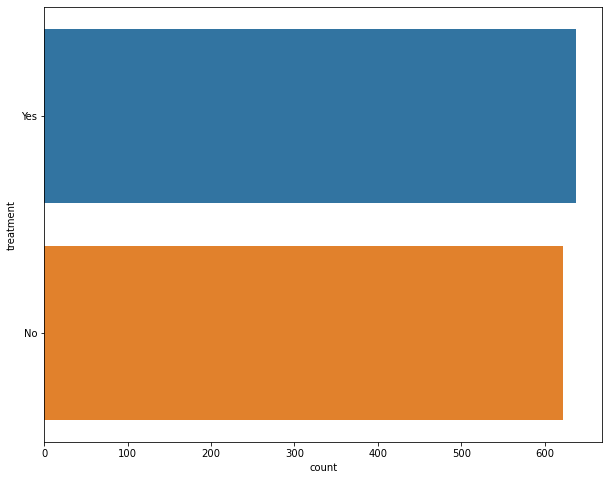

  treatment  counts
0       Yes     637
1        No     622 



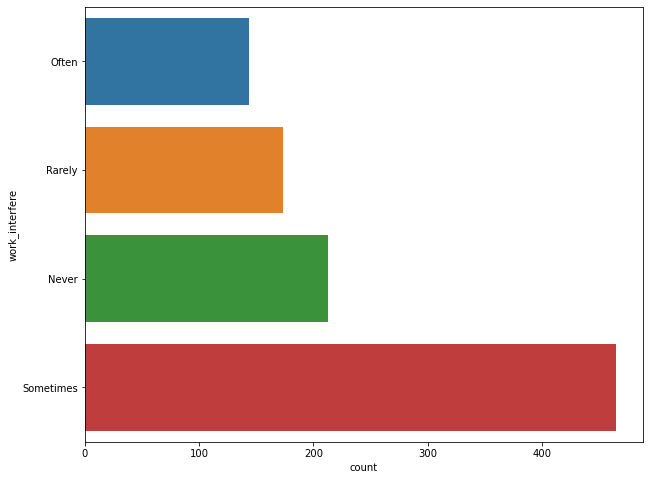

  work_interfere  counts
0      Sometimes     465
1          Never     213
2         Rarely     173
3          Often     144 



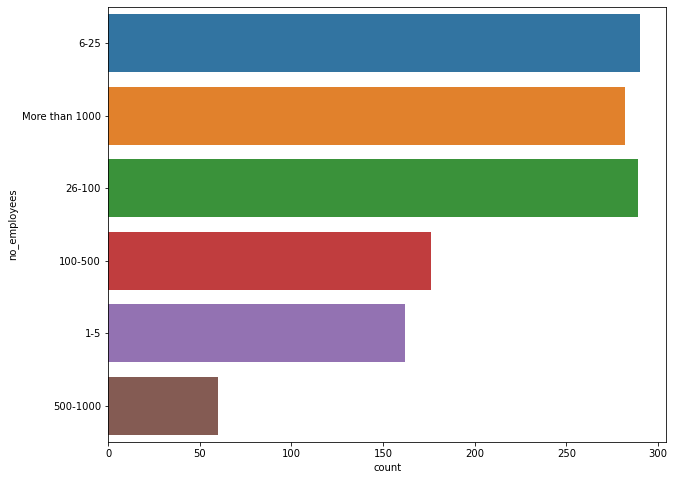

     no_employees  counts
0            6-25     290
1          26-100     289
2  More than 1000     282
3         100-500     176
4             1-5     162
5        500-1000      60 



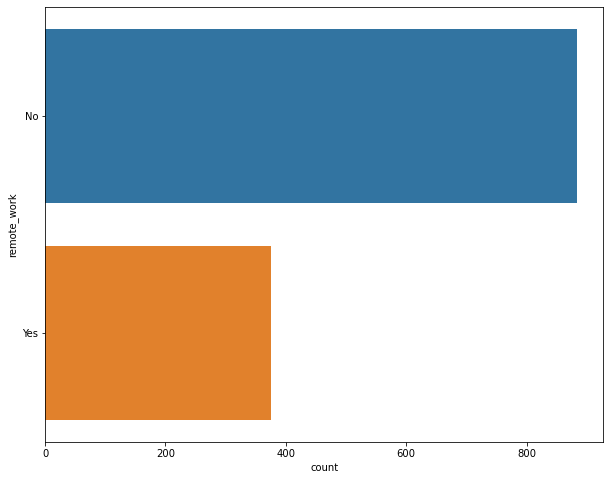

  remote_work  counts
0          No     883
1         Yes     376 



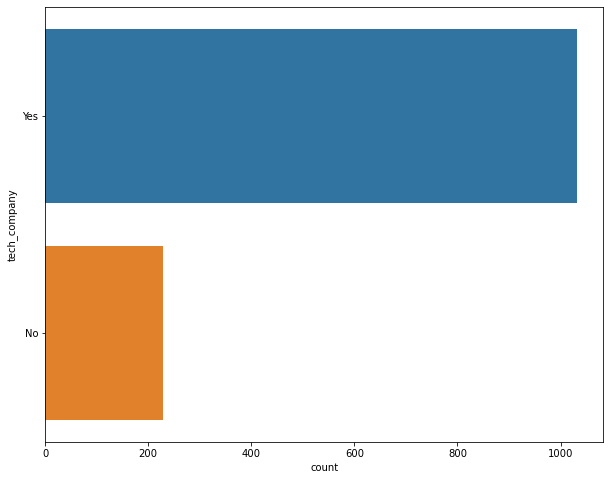

  tech_company  counts
0          Yes    1031
1           No     228 



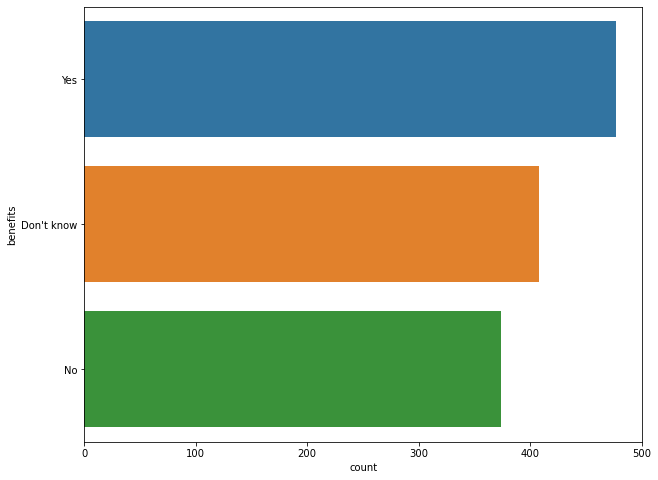

     benefits  counts
0         Yes     477
1  Don't know     408
2          No     374 



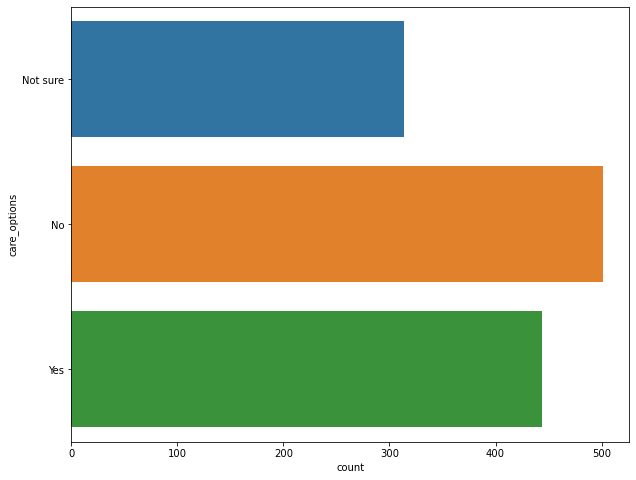

  care_options  counts
0           No     501
1          Yes     444
2     Not sure     314 



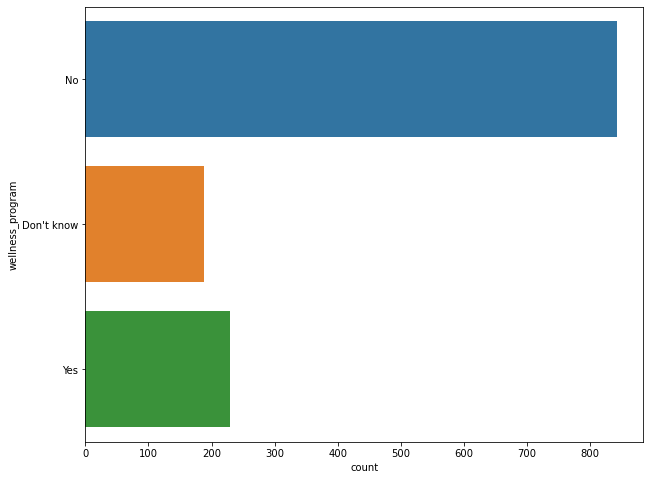

  wellness_program  counts
0               No     842
1              Yes     229
2       Don't know     188 



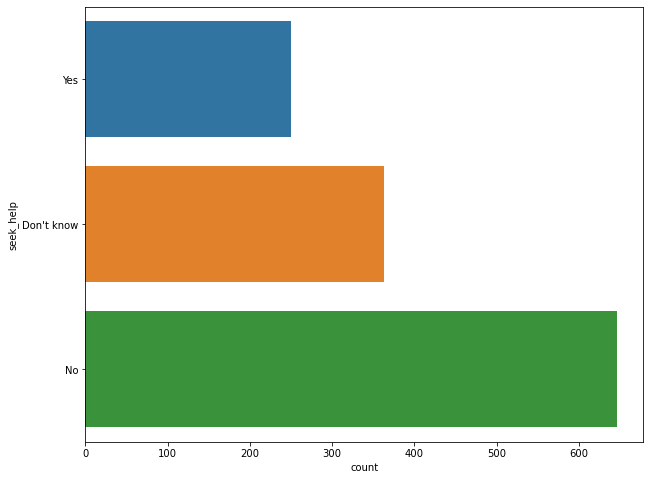

    seek_help  counts
0          No     646
1  Don't know     363
2         Yes     250 



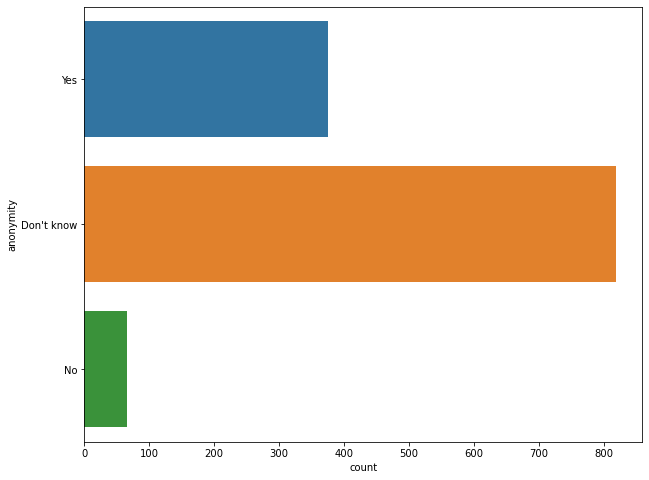

    anonymity  counts
0  Don't know     819
1         Yes     375
2          No      65 



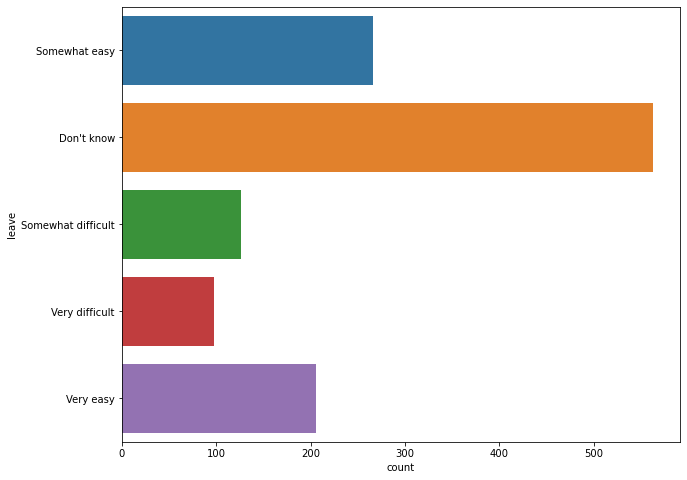

                leave  counts
0          Don't know     563
1       Somewhat easy     266
2           Very easy     206
3  Somewhat difficult     126
4      Very difficult      98 



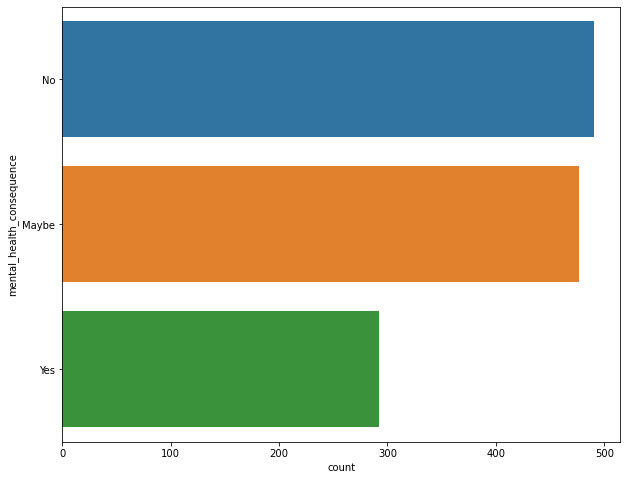

  mental_health_consequence  counts
0                        No     490
1                     Maybe     477
2                       Yes     292 



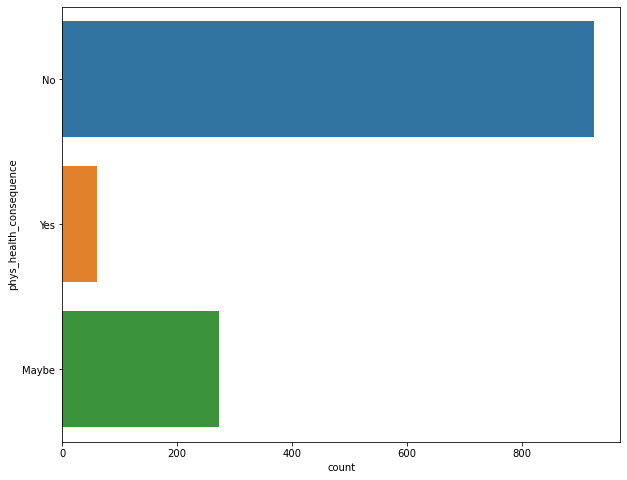

  phys_health_consequence  counts
0                      No     925
1                   Maybe     273
2                     Yes      61 



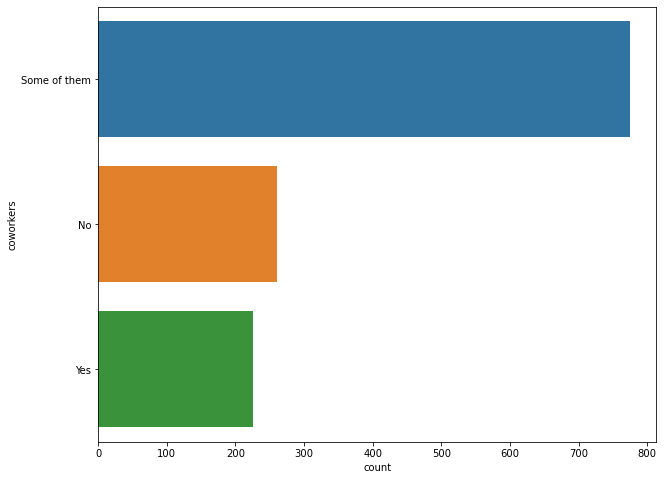

      coworkers  counts
0  Some of them     774
1            No     260
2           Yes     225 



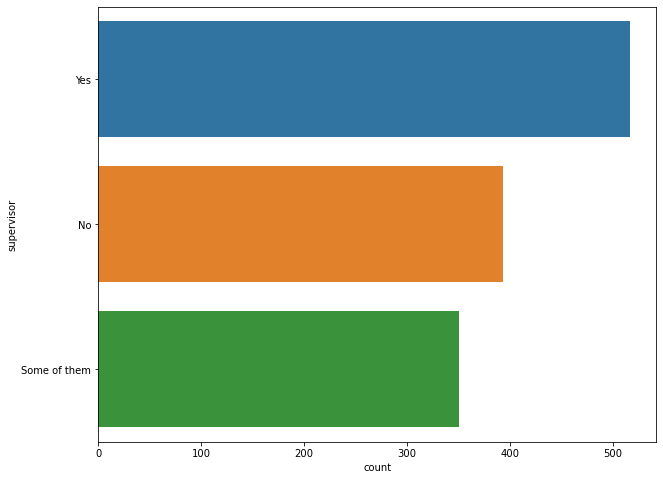

     supervisor  counts
0           Yes     516
1            No     393
2  Some of them     350 



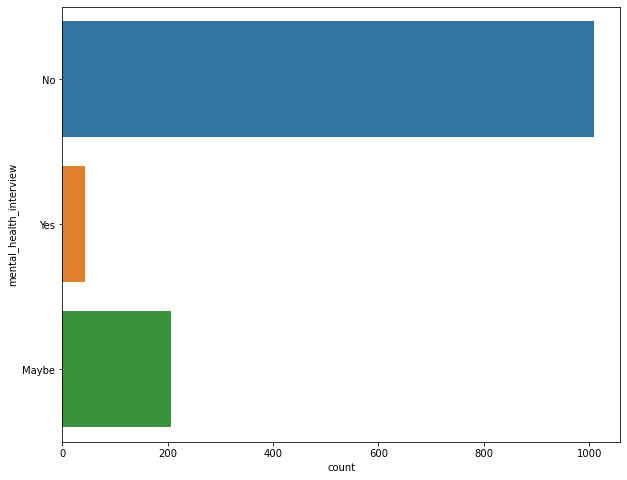

  mental_health_interview  counts
0                      No    1008
1                   Maybe     207
2                     Yes      44 



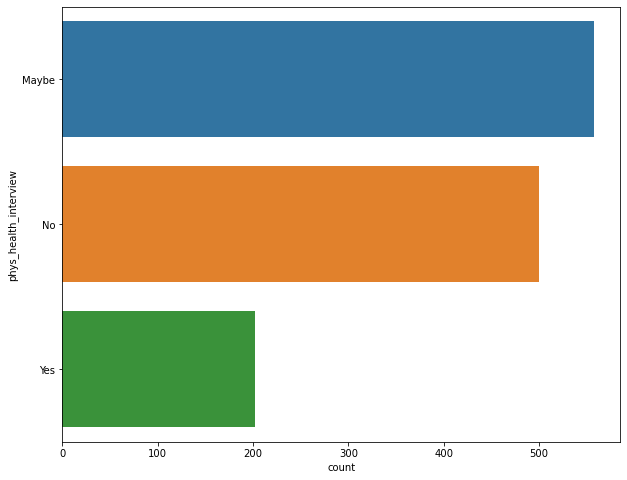

  phys_health_interview  counts
0                 Maybe     557
1                    No     500
2                   Yes     202 



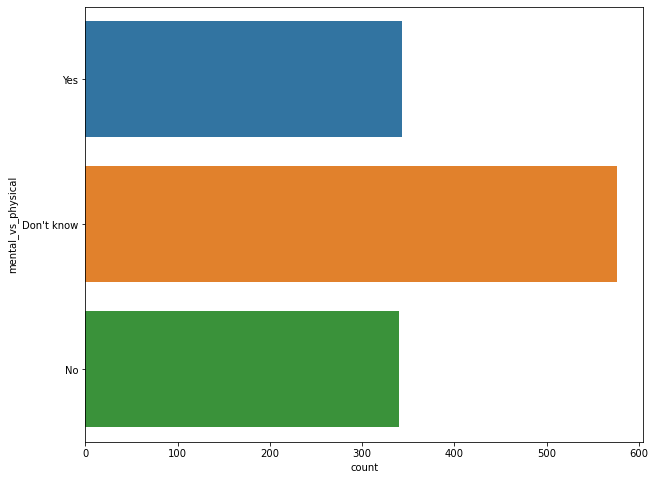

  mental_vs_physical  counts
0         Don't know     576
1                Yes     343
2                 No     340 



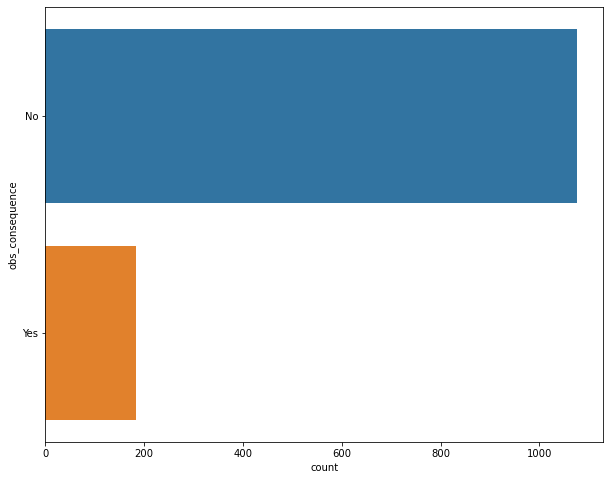

  obs_consequence  counts
0              No    1075
1             Yes     184 



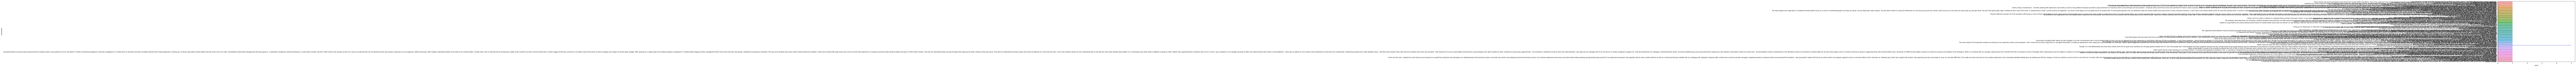

                                              comments  counts
0                      * Small family business - YMMV.       5
1    My company does provide healthcare but not to ...       1
2    Had a co-worker disappear from work for a few ...       1
3    I have Narcolepsy and have been fired from a j...       1
4    My employer is extremely easy to work with and...       1
..                                                 ...     ...
155  In Russia we have mandatory medical insurance....       1
156  I should note one of the places my employer fa...       1
157  My mental health issues were the direct result...       1
158  None of us who are already in marginal groups ...       1
159  I've answered 'Yes' on remote working but 50% ...       1

[160 rows x 2 columns] 



In [9]:
understand_dist(mental_health_dataset.drop(["Timestamp"],axis=1),"Categorical")  #genera las gráficas sobre nuestras características categoricas  dataset


In [10]:
#tractar els NaNs
#Omplim amb el valor que més es repeteix
#omplim els nans de state amb "outsider"
#omplim el comenyaris amb "no comments"
mental_health_dataset.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [11]:
mental_health_dataset.loc[mental_health_dataset.self_employed.isnull(),'self_employed'] = mental_health_dataset.self_employed.mode().iloc[0]
mental_health_dataset.loc[mental_health_dataset.work_interfere.isnull(),'work_interfere'] = mental_health_dataset.work_interfere.mode().iloc[0]
mental_health_dataset.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [12]:
# mental_health_dataset.loc[mental_health_dataset.state.isnull(),'state'] = "outsider"
mental_health_dataset.loc[mental_health_dataset.state.isnull(),'state'] = "outsider"
mental_health_dataset.loc[mental_health_dataset.comments.isnull(),'comments'] = "no_comments"

In [13]:
print("Null count :\n\n"+str(mental_health_dataset.isnull().sum()))

Null count :

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64


In [14]:
#solucionamos problemas con el campoo gender ( clasificamos en: male, female, LGBTQ)
gender_dict_map = {'Male':'Male','male':'Male','male ':'Male','Female':'Female','M':'Male','female':'Female','F':'Female','m':'Male','f':'Female',
                   'Make':'Male','Woman':'Female','Male ':'Male','Female ':'Female','Man':'Male','Female (trans)':'LGBTQ','Cis Male':'Male','Male-ish':'LGBTQ','p':'LGBTQ','femail':'Female',
                   'woman':'Female','Agender':'LGBTQ','Cis Female':'Female','Guy (-ish) ^_^':'LGBTQ','Malr':'Male','Trans woman':'LGBTQ','Mail':'Male','fluid':'LGBTQ','Cis Man':'Male',
                   'Female (cis)':'Female','cis male':'Male','male leaning androgynous':'LGBTQ','queer':'LGBTQ','A little about you':'LGBTQ','Androgyne':'LGBTQ','non-binary':'LGBTQ',
                   'Trans-female':'LGBTQ','something kinda male?':'LGBTQ','Male (CIS)':'Male','queer/she/they':'LGBTQ','Genderqueer':'LGBTQ','ostensibly male, unsure what that really means':'LGBTQ',
                   'cis-female/femme':'Female','maile':'Male','All':'LGBTQ','Mal':'Male','Femake':'Female','Neuter':'LGBTQ','Nah':'LGBTQ','Enby':'LGBTQ','msle':'Male'}

In [15]:
mental_health_dataset.Gender = mental_health_dataset.Gender.map(gender_dict_map)


In [16]:
#mirar si hay valores unicos de genero
orig_mental_health_dataset.loc[mental_health_dataset.Gender[mental_health_dataset.Gender.isnull()].index].Gender.unique()

array([], dtype=object)

In [17]:
mental_health_dataset.head(20)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,no_comments
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,no_comments
2,2014-08-27 11:29:44,32,Male,Canada,outsider,No,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,no_comments
3,2014-08-27 11:29:46,31,Male,United Kingdom,outsider,No,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,no_comments
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,no_comments
5,2014-08-27 11:31:22,33,Male,United States,TN,No,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,no_comments
6,2014-08-27 11:31:50,35,Female,United States,MI,No,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,no_comments
7,2014-08-27 11:32:05,39,Male,Canada,outsider,No,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,no_comments
8,2014-08-27 11:32:39,42,Female,United States,IL,No,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,no_comments
9,2014-08-27 11:32:43,23,Male,Canada,outsider,No,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,no_comments


In [18]:
# necesitamos que las edades esten entre 18 y 72 ambos incluidos
mental_health_dataset.loc[mental_health_dataset.Age<18,'Age']=18
mental_health_dataset.loc[mental_health_dataset.Age>70,'Age']=72

mental_health_true_age = mental_health_dataset.Age
display(mental_health_true_age)

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64

In [22]:
# Converting categorical variables to numeric represtation

mental_health_dataset = pd.get_dummies(mental_health_dataset)
mental_health_dataset.head()

,Age,Timestamp_2014-08-27 11:29:31,Timestamp_2014-08-27 11:29:37,Timestamp_2014-08-27 11:29:44,Timestamp_2014-08-27 11:29:46,Timestamp_2014-08-27 11:30:22,Timestamp_2014-08-27 11:31:22,Timestamp_2014-08-27 11:31:50,Timestamp_2014-08-27 11:32:05,Timestamp_2014-08-27 11:32:39,...,comments_YOU MAY WANT TO THROW OUT MY ENTRY.I answered all of these questions with the assumption that Attention Deficit Disorder is considered a mental illness and with ADD in mind.,comments_as a UK-based company we don't have any medical provisions as it's all provided on the National Health Service (for now!) However if we do need to take days off for any kind of health problems everyone is understanding :),comments_fwiw I am a co founder of this company and the would you X in an interview questions shouldn't reflect how I would treat anyone addressing their own phys/mental health issue to me in such a situation.,comments_i'm in a country with social health care so my options are not dependant on my employer. this makes a few of the early questions less relevant than they would be for a resident of the US.,comments_it is my opinion that bad mental health is a red flag for employers and i would never bring it up.,comments_no_comments,comments_password: testered,comments_suffer from CR-PTSD so all answered based on that,comments_thanks for what you're doing. FYI these questions dont quite work for entrepreneurs where employer == cofounders / sr mgmt / me,comments_you rock for doing this!
0,37,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,44,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,32,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,31,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,31,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# understand_dist(mental_health_dataset,"Categorical")
# understand_dist(mental_health_dataset,"Numeric")

CLUSTERING

Kmeans

                                                       0     1   Diff  \
benefits_Yes                                       77.69 10.70  67.00   
care_options_Yes                                   72.21 10.03  62.18   
care_options_No                                    11.94 58.82 -46.89   
treatment_Yes                                      78.08 31.82  46.26   
treatment_No                                       21.92 68.18 -46.26   
benefits_Don't know                                 5.48 50.80 -45.32   
anonymity_Yes                                      53.62 13.50  40.12   
anonymity_Don't know                               41.88 80.88 -39.00   
seek_help_Yes                                      41.88  4.81  37.07   
wellness_program_Yes                               38.94  4.01  34.93   
Country_United States                              79.26 46.26  33.00   
state_outsider                                     21.33 54.28 -32.95   
wellness_program_No                                

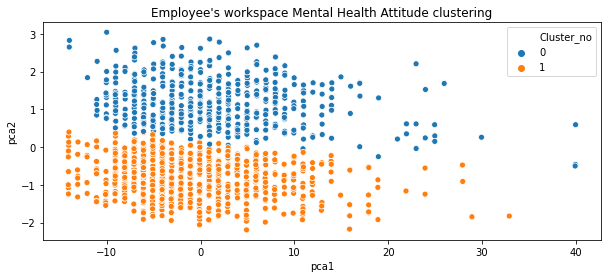

In [30]:
# Standard scaling (Usually from 0 to 1) is mandatory for a clustering problem
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


if 'Cluster_no' in mental_health_dataset.columns:
    mental_health_dataset = mental_health_dataset.drop('Cluster_no', axis=1)
scaler = MinMaxScaler()
mental_health_dataset = pd.DataFrame(scaler.fit_transform(mental_health_dataset),columns=mental_health_dataset.columns)

# For now, we are interested in only 2 clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto',random_state=1)
kmeans = kmeans.fit(mental_health_dataset.drop(['Age'],axis=1))

cluster = []

for x in range(len(mental_health_dataset)):
    predict_me = np.array(mental_health_dataset.drop(['Age'],axis=1).iloc[x].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    cluster.append(kmeans.predict(predict_me)[0])

mental_health_dataset = pd.concat([mental_health_dataset,pd.Series(cluster,name='Cluster_no')],axis=1)

mental_health_dataset.Age = mental_health_true_age

cluster_1 = mental_health_dataset[mental_health_dataset.Cluster_no==0]
cluster_2 = mental_health_dataset[mental_health_dataset.Cluster_no==1]


with pd.option_context('display.max_rows', None, 'display.max_columns', None):

    # We use mean to calculate % of employees who answered the index value
    cluster_compare = pd.concat([cluster_1.mean(),cluster_2.mean()],axis=1)
    cluster_compare.columns=['0','1']
    cluster_compare = cluster_compare.drop('Cluster_no')
    for index,row in cluster_compare.iterrows():
        if index!="Age":
            row['0']=row['0']*100
            row['1']=row['1']*100
    cluster_compare['Diff'] = (cluster_compare['0']-cluster_compare['1'])
    cluster_compare['Abs Diff'] = np.abs(cluster_compare['0']-cluster_compare['1'])
    cluster_compare=cluster_compare.sort_values(by='Abs Diff',ascending=False)
    print(cluster_compare)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    cluster_compare = pd.concat([cluster_1.mean(),cluster_2.mean()],axis=1)
    cluster_compare.columns=['0','1']
    cluster_compare = cluster_compare.drop('Cluster_no')
    for index,row in cluster_compare.iterrows():
        if index!="Age":
            row['0']=row['0']*100
            row['1']=row['1']*100
    cluster_compare['Diff'] = (cluster_compare['0']-cluster_compare['1'])
    cluster_compare['Abs Diff'] = np.abs(cluster_compare['0']-cluster_compare['1'])
    # print(cluster_compare)

# PCA conversion to plot clusters succesfully in 2D

from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(mental_health_dataset)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

plt.figure(figsize=(10,4))
sns.scatterplot(x="pca1", y="pca2", hue=mental_health_dataset['Cluster_no'], data=results)
plt.title("Employee's workspace Mental Health Attitude clustering")
plt.show()

Provar diferents tipus d'algoritmes:


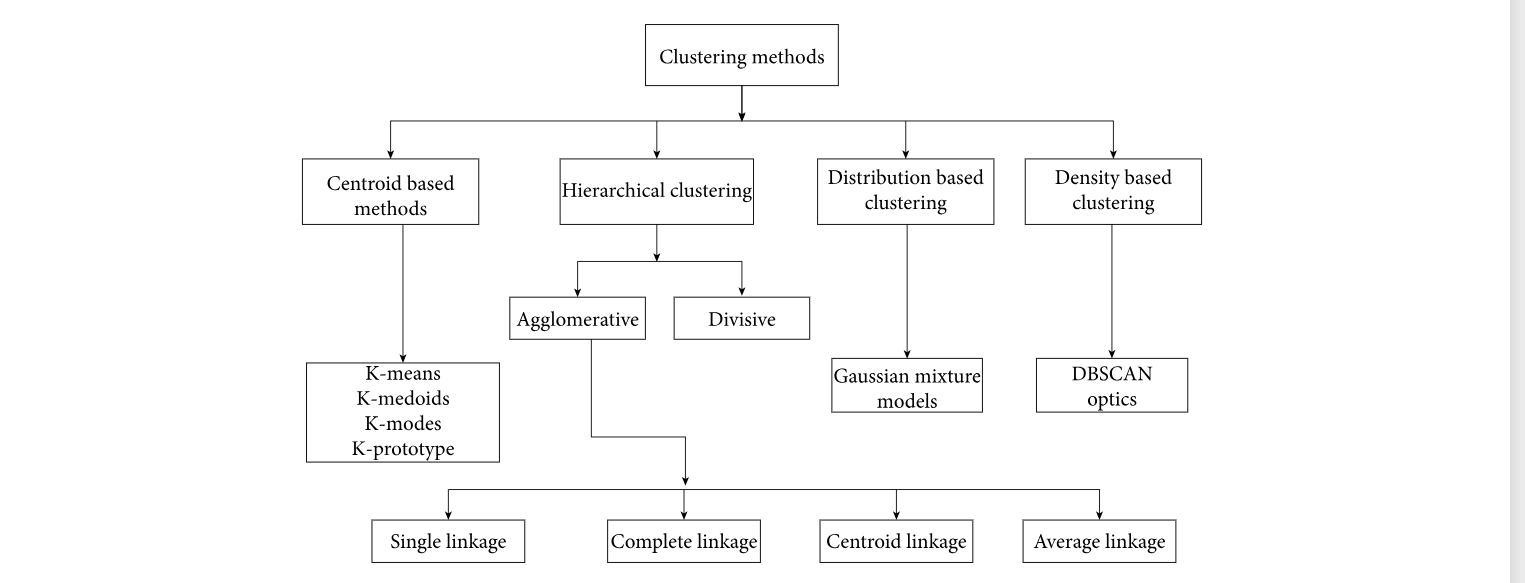

El tipo de algoritmo de clustering más adecuado para tu conjunto de datos dependerá de diversos factores, como la distribución de los datos, la dimensionalidad y la naturaleza de las relaciones entre las variables.

K-Means: Este es uno de los algoritmos de clustering más comunes. Es eficiente y fácil de entender. Puede ser útil para identificar grupos de individuos con características similares, por ejemplo, en términos de edad, género, y otros factores.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise): DBSCAN es bueno para identificar grupos con formas más complejas y es resistente al ruido. Puede ser útil si hay densidades variables en diferentes regiones del espacio.

Hierarchical Clustering: Este método construye una jerarquía de grupos y puede ser útil si existe una estructura jerárquica en tus datos. Puede proporcionar una visión más detallada de cómo se agrupan los datos a diferentes niveles.

Gaussian Mixture Model (GMM): GMM asume que los datos están generados por un conjunto de distribuciones gaussianas. Es útil cuando los grupos en tus datos pueden tener formas más complejas y superposiciones.

Mean Shift: Mean Shift es adecuado para datos con formas irregulares y no paramétricas. Encuentra los modos de densidad en los datos, lo que puede ser útil si hay regiones de alta densidad en tus datos.

Clustering Espectral: Este método es eficaz para identificar agrupaciones en datos no lineales y puede ser útil si hay relaciones no lineales en tu conjunto de datos.

Antes de aplicar estos algoritmos, es importante preprocesar tus datos para manejar valores atípicos, normalizar características y manejar datos categóricos como el género y el país adecuadamente (por ejemplo, mediante codificación one-hot).

Gaussian Mixture Model

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

'hola'

,Age,Timestamp_2014-08-27 11:29:31,Timestamp_2014-08-27 11:29:37,Timestamp_2014-08-27 11:29:44,Timestamp_2014-08-27 11:29:46,Timestamp_2014-08-27 11:30:22,Timestamp_2014-08-27 11:31:22,Timestamp_2014-08-27 11:31:50,Timestamp_2014-08-27 11:32:05,Timestamp_2014-08-27 11:32:39,...,comments_as a UK-based company we don't have any medical provisions as it's all provided on the National Health Service (for now!) However if we do need to take days off for any kind of health problems everyone is understanding :),comments_fwiw I am a co founder of this company and the would you X in an interview questions shouldn't reflect how I would treat anyone addressing their own phys/mental health issue to me in such a situation.,comments_i'm in a country with social health care so my options are not dependant on my employer. this makes a few of the early questions less relevant than they would be for a resident of the US.,comments_it is my opinion that bad mental health is a red flag for employers and i would never bring it up.,comments_no_comments,comments_password: testered,comments_suffer from CR-PTSD so all answered based on that,comments_thanks for what you're doing. FYI these questions dont quite work for entrepreneurs where employer == cofounders / sr mgmt / me,comments_you rock for doing this!,Cluster_no
0,0.35,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0
1,0.48,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1
2,0.26,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0
3,0.24,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1
4,0.24,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1
1255,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0
1256,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1
1257,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1


'hola'

,Age,Timestamp_2014-08-27 11:29:31,Timestamp_2014-08-27 11:29:37,Timestamp_2014-08-27 11:29:44,Timestamp_2014-08-27 11:29:46,Timestamp_2014-08-27 11:30:22,Timestamp_2014-08-27 11:31:22,Timestamp_2014-08-27 11:31:50,Timestamp_2014-08-27 11:32:05,Timestamp_2014-08-27 11:32:39,...,comments_as a UK-based company we don't have any medical provisions as it's all provided on the National Health Service (for now!) However if we do need to take days off for any kind of health problems everyone is understanding :),comments_fwiw I am a co founder of this company and the would you X in an interview questions shouldn't reflect how I would treat anyone addressing their own phys/mental health issue to me in such a situation.,comments_i'm in a country with social health care so my options are not dependant on my employer. this makes a few of the early questions less relevant than they would be for a resident of the US.,comments_it is my opinion that bad mental health is a red flag for employers and i would never bring it up.,comments_no_comments,comments_password: testered,comments_suffer from CR-PTSD so all answered based on that,comments_thanks for what you're doing. FYI these questions dont quite work for entrepreneurs where employer == cofounders / sr mgmt / me,comments_you rock for doing this!,Cluster_no
0,0.35,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0
1,0.48,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1
2,0.26,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0
3,0.24,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1
4,0.24,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1
1255,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0
1256,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1
1257,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1


                                                       0     1   Diff  \
mental_health_consequence_No                       84.98  5.87  79.11   
supervisor_Yes                                     80.80 12.41  68.38   
supervisor_No                                       3.23 51.30 -48.06   
mental_health_consequence_Maybe                    12.93 55.80 -42.87   
mental_vs_physical_Yes                             52.09  9.41  42.68   
phys_health_consequence_No                         96.39 57.03  39.36   
mental_health_consequence_Yes                       2.09 38.34 -36.24   
mental_health_interview_No                         60.46 94.13 -33.68   
phys_health_consequence_Maybe                       3.23 34.92 -31.69   
coworkers_Yes                                      35.55  5.18  30.37   
coworkers_No                                        3.80 32.74 -28.94   
mental_vs_physical_No                              11.22 38.34 -27.12   
mental_health_interview_Maybe                      

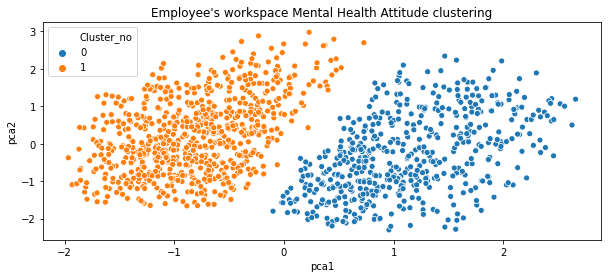

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


if 'Cluster_no' in mental_health_dataset.columns:
    mental_health_dataset = mental_health_dataset.drop('Cluster_no', axis=1)
# Standard scaling (Usually from 0 to 1) is mandatory for a clustering problem
scaler = MinMaxScaler()
mental_health_dataset = pd.DataFrame(scaler.fit_transform(mental_health_dataset), columns=mental_health_dataset.columns)



# Use Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=1)
gmm.fit(mental_health_dataset)

# Predict clusters
cluster = gmm.predict(mental_health_dataset)
display(cluster)
mental_health_dataset = pd.concat([mental_health_dataset, pd.Series(cluster, name='Cluster_no')], axis=1)
display("hola",mental_health_dataset)
# mental_health_dataset.Age = mental_health_true_age



display("hola",mental_health_dataset)

cluster_1 = mental_health_dataset[mental_health_dataset.Cluster_no == 0]
cluster_2 = mental_health_dataset[mental_health_dataset.Cluster_no == 1]

# Display cluster comparison
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    cluster_compare = pd.concat([cluster_1.mean(), cluster_2.mean()], axis=1)
    cluster_compare.columns = ['0', '1']
    cluster_compare = cluster_compare.drop('Cluster_no')
    for index, row in cluster_compare.iterrows():
        if index != "Age":
            row['0'] = row['0'] * 100
            row['1'] = row['1'] * 100
    cluster_compare['Diff'] = (cluster_compare['0'] - cluster_compare['1'])
    cluster_compare['Abs Diff'] = np.abs(cluster_compare['0'] - cluster_compare['1'])
    cluster_compare = cluster_compare.sort_values(by='Abs Diff', ascending=False)
    print(cluster_compare)

# Plot clusters using PCA
reduced_data = PCA(n_components=2).fit_transform(mental_health_dataset.drop(['Age'], axis=1))
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])

plt.figure(figsize=(10, 4))
sns.scatterplot(x="pca1", y="pca2", hue=mental_health_dataset['Cluster_no'], data=results)
plt.title("Employee's workspace Mental Health Attitude clustering")
plt.show()


DBSCAN

                                                     0   1  Diff  Abs Diff
Age                                                nan nan   nan       nan
Timestamp_2014-08-27 11:29:31                      nan nan   nan       nan
Timestamp_2014-08-27 11:29:37                      nan nan   nan       nan
Timestamp_2014-08-27 11:29:44                      nan nan   nan       nan
Timestamp_2014-08-27 11:29:46                      nan nan   nan       nan
Timestamp_2014-08-27 11:30:22                      nan nan   nan       nan
Timestamp_2014-08-27 11:31:22                      nan nan   nan       nan
Timestamp_2014-08-27 11:31:50                      nan nan   nan       nan
Timestamp_2014-08-27 11:32:05                      nan nan   nan       nan
Timestamp_2014-08-27 11:32:39                      nan nan   nan       nan
Timestamp_2014-08-27 11:32:43                      nan nan   nan       nan
Timestamp_2014-08-27 11:32:44                      nan nan   nan       nan
Timestamp_2014-08-27 11:3

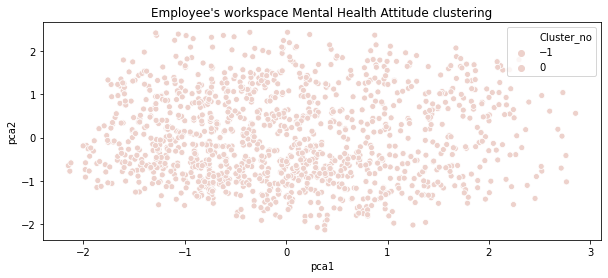

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar y eliminar la columna 'Cluster_no' si ya existe
if 'Cluster_no' in mental_health_dataset.columns:
    mental_health_dataset = mental_health_dataset.drop('Cluster_no', axis=1)

# Standard scaling (Usually from 0 to 1) is mandatory for a clustering problem
scaler = MinMaxScaler()
mental_health_dataset = pd.DataFrame(scaler.fit_transform(mental_health_dataset), columns=mental_health_dataset.columns)

# Use DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Puedes ajustar eps y min_samples según tu necesidad
cluster = dbscan.fit_predict(mental_health_dataset.drop(['Age'], axis=1))
mental_health_dataset = pd.concat([mental_health_dataset, pd.Series(cluster, name='Cluster_no')], axis=1)
mental_health_dataset.Age = mental_health_true_age

# Filtrar datos por clusters asignados por DBSCAN
cluster_1 = mental_health_dataset[mental_health_dataset.Cluster_no == 0]
cluster_2 = mental_health_dataset[mental_health_dataset.Cluster_no == 1]

# Display cluster comparison
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    cluster_compare = pd.concat([cluster_1.mean(), cluster_2.mean()], axis=1)
    cluster_compare.columns = ['0', '1']
    cluster_compare = cluster_compare.drop('Cluster_no')
    for index, row in cluster_compare.iterrows():
        if index != "Age":
            row['0'] = row['0'] * 100
            row['1'] = row['1'] * 100
    cluster_compare['Diff'] = (cluster_compare['0'] - cluster_compare['1'])
    cluster_compare['Abs Diff'] = np.abs(cluster_compare['0'] - cluster_compare['1'])
    cluster_compare = cluster_compare.sort_values(by='Abs Diff', ascending=False)
    print(cluster_compare)

# Plot clusters using PCA
reduced_data = PCA(n_components=2).fit_transform(mental_health_dataset.drop(['Age'], axis=1))
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])

plt.figure(figsize=(10, 4))
sns.scatterplot(x="pca1", y="pca2", hue=mental_health_dataset['Cluster_no'], data=results)
plt.title("Employee's workspace Mental Health Attitude clustering")
plt.show()


MeanShift

                                                       0   1  Diff  Abs Diff
Age                                                32.07 nan   nan       nan
Timestamp_2014-08-27 11:29:31                       0.08 nan   nan       nan
Timestamp_2014-08-27 11:29:37                       0.08 nan   nan       nan
Timestamp_2014-08-27 11:29:44                       0.08 nan   nan       nan
Timestamp_2014-08-27 11:29:46                       0.08 nan   nan       nan
Timestamp_2014-08-27 11:30:22                       0.08 nan   nan       nan
Timestamp_2014-08-27 11:31:22                       0.08 nan   nan       nan
Timestamp_2014-08-27 11:31:50                       0.08 nan   nan       nan
Timestamp_2014-08-27 11:32:05                       0.08 nan   nan       nan
Timestamp_2014-08-27 11:32:39                       0.08 nan   nan       nan
Timestamp_2014-08-27 11:32:43                       0.08 nan   nan       nan
Timestamp_2014-08-27 11:32:44                       0.08 nan   nan       nan

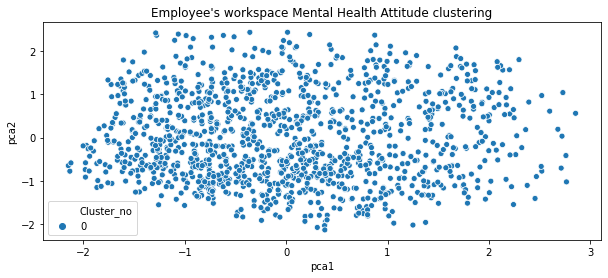

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar y eliminar la columna 'Cluster_no' si ya existe
if 'Cluster_no' in mental_health_dataset.columns:
    mental_health_dataset = mental_health_dataset.drop('Cluster_no', axis=1)

# Standard scaling (Usually from 0 to 1) is mandatory for a clustering problem
scaler = MinMaxScaler()
mental_health_dataset = pd.DataFrame(scaler.fit_transform(mental_health_dataset), columns=mental_health_dataset.columns)

# Use Mean Shift
meanshift = MeanShift()
cluster = meanshift.fit_predict(mental_health_dataset.drop(['Age'], axis=1))
mental_health_dataset = pd.concat([mental_health_dataset, pd.Series(cluster, name='Cluster_no')], axis=1)
mental_health_dataset.Age = mental_health_true_age

# Filtrar datos por clusters asignados por meanshift
cluster_1 = mental_health_dataset[mental_health_dataset.Cluster_no == 0]
cluster_2 = mental_health_dataset[mental_health_dataset.Cluster_no == 1]


# Display cluster comparison
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    cluster_compare = pd.concat([cluster_1.mean(), cluster_2.mean()], axis=1)
    cluster_compare.columns = ['0', '1']
    cluster_compare = cluster_compare.drop('Cluster_no')
    for index, row in cluster_compare.iterrows():
        if index != "Age":
            row['0'] = row['0'] * 100
            row['1'] = row['1'] * 100
    cluster_compare['Diff'] = (cluster_compare['0'] - cluster_compare['1'])
    cluster_compare['Abs Diff'] = np.abs(cluster_compare['0'] - cluster_compare['1'])
    cluster_compare = cluster_compare.sort_values(by='Abs Diff', ascending=False)
    print(cluster_compare)

# Plot clusters using PCA
reduced_data = PCA(n_components=2).fit_transform(mental_health_dataset.drop(['Age'], axis=1))
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])

plt.figure(figsize=(10, 4))
sns.scatterplot(x="pca1", y="pca2", hue=mental_health_dataset['Cluster_no'], data=results)
plt.title("Employee's workspace Mental Health Attitude clustering")
plt.show()




Hierarchical Clustering

                                                       0     1   Diff  \
seek_help_Yes                                       5.13 62.35 -57.21   
wellness_program_Yes                                3.85 59.57 -55.72   
benefits_Yes                                       23.74 78.70 -54.96   
wellness_program_No                                80.00 29.01  50.99   
anonymity_Yes                                      17.11 66.36 -49.25   
care_options_Yes                                   23.10 70.37 -47.27   
anonymity_Don't know                               76.36 32.41  43.96   
seek_help_No                                       60.96 23.46  37.51   
mental_vs_physical_Yes                             17.75 54.63 -36.88   
benefits_Don't know                                41.39  6.48  34.91   
care_options_No                                    48.24 15.43  32.80   
mental_vs_physical_Don't know                      53.16 24.38  28.77   
supervisor_Yes                                     

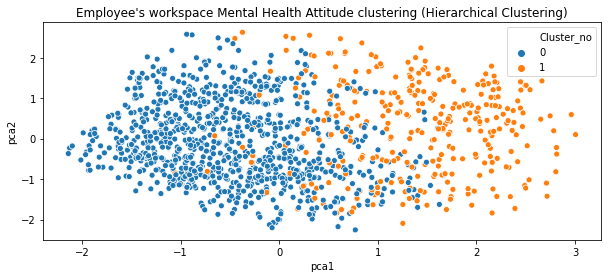

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar y eliminar la columna 'Cluster_no' si ya existe
if 'Cluster_no' in mental_health_dataset.columns:
    mental_health_dataset = mental_health_dataset.drop('Cluster_no', axis=1)


#Hierarchical Clustering
scaler = MinMaxScaler()
mental_health_dataset = pd.DataFrame(scaler.fit_transform(mental_health_dataset), columns=mental_health_dataset.columns)

hierarchical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster = hierarchical.fit_predict(mental_health_dataset.drop(['Age'], axis=1))
mental_health_dataset = pd.concat([mental_health_dataset, pd.Series(cluster, name='Cluster_no')], axis=1)
mental_health_dataset.Age = mental_health_true_age

# Filtrar datos por clusters asignados por Hierarchical Clustering
cluster_1 = mental_health_dataset[mental_health_dataset.Cluster_no == 0]
cluster_2 = mental_health_dataset[mental_health_dataset.Cluster_no == 1]

# Display cluster comparison
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    cluster_compare = pd.concat([cluster_1.mean(), cluster_2.mean()], axis=1)
    cluster_compare.columns = ['0', '1']
    cluster_compare = cluster_compare.drop('Cluster_no')
    for index, row in cluster_compare.iterrows():
        if index != "Age":
            row['0'] = row['0'] * 100
            row['1'] = row['1'] * 100
    cluster_compare['Diff'] = (cluster_compare['0'] - cluster_compare['1'])
    cluster_compare['Abs Diff'] = np.abs(cluster_compare['0'] - cluster_compare['1'])
    cluster_compare = cluster_compare.sort_values(by='Abs Diff', ascending=False)
    print(cluster_compare)

# Plot clusters using PCA
reduced_data = PCA(n_components=2).fit_transform(mental_health_dataset.drop(['Age'], axis=1))
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])

plt.figure(figsize=(10, 4))
sns.scatterplot(x="pca1", y="pca2", hue=mental_health_dataset['Cluster_no'], data=results)
plt.title("Employee's workspace Mental Health Attitude clustering (Hierarchical Clustering)")
plt.show()

Clustering Spectral

                                                       0     1   Diff  \
benefits_Yes                                       88.65 16.02  72.63   
seek_help_Yes                                      57.26  3.75  53.51   
wellness_program_No                                30.34 82.61 -52.27   
care_options_Yes                                   69.66 20.45  49.20   
wellness_program_Yes                               51.45  3.86  47.59   
seek_help_No                                       18.21 65.57 -47.36   
anonymity_Yes                                      61.21 16.25  44.96   
care_options_No                                    10.82 52.27 -41.45   
anonymity_Don't know                               37.20 77.05 -39.84   
benefits_Don't know                                 6.07 43.75 -37.68   
benefits_No                                         5.28 40.23 -34.95   
no_employees_More than 1000                        44.06 13.07  31.00   
state_outsider                                     

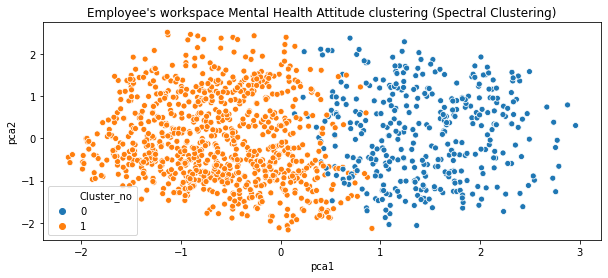

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar y eliminar la columna 'Cluster_no' si ya existe
if 'Cluster_no' in mental_health_dataset.columns:
    mental_health_dataset = mental_health_dataset.drop('Cluster_no', axis=1)

# Standard scaling (Usually from 0 to 1) is mandatory for a clustering problem
scaler = MinMaxScaler()
mental_health_dataset = pd.DataFrame(scaler.fit_transform(mental_health_dataset), columns=mental_health_dataset.columns)

# Use Clustering Espectral
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
cluster = spectral.fit_predict(mental_health_dataset.drop(['Age'], axis=1))
mental_health_dataset = pd.concat([mental_health_dataset, pd.Series(cluster, name='Cluster_no')], axis=1)
mental_health_dataset.Age = mental_health_true_age

# Filtrar datos por clusters asignados por Clustering Espectral
cluster_1 = mental_health_dataset[mental_health_dataset.Cluster_no == 0]
cluster_2 = mental_health_dataset[mental_health_dataset.Cluster_no == 1]

# Display cluster comparison
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    cluster_compare = pd.concat([cluster_1.mean(), cluster_2.mean()], axis=1)
    cluster_compare.columns = ['0', '1']
    cluster_compare = cluster_compare.drop('Cluster_no')
    for index, row in cluster_compare.iterrows():
        if index != "Age":
            row['0'] = row['0'] * 100
            row['1'] = row['1'] * 100
    cluster_compare['Diff'] = (cluster_compare['0'] - cluster_compare['1'])
    cluster_compare['Abs Diff'] = np.abs(cluster_compare['0'] - cluster_compare['1'])
    cluster_compare = cluster_compare.sort_values(by='Abs Diff', ascending=False)
    print(cluster_compare)

# Plot clusters using PCA
reduced_data = PCA(n_components=2).fit_transform(mental_health_dataset.drop(['Age'], axis=1))
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])

plt.figure(figsize=(10, 4))
sns.scatterplot(x="pca1", y="pca2", hue=mental_health_dataset['Cluster_no'], data=results)
plt.title("Employee's workspace Mental Health Attitude clustering (Spectral Clustering)")
plt.show()
